# Lesson 08: pandas II

최규빈  
2023-07-24

<a href="https://colab.research.google.com/github/guebin/PP2024WIN/blob/main/posts/Day2/ls08.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# imports

In [1]:
import pandas as pd

# 예비학습

## lambda

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임

In [127]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

**(사용방법)**

In [128]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

In [129]:
(lambda x: (x-2)**2)(5) # 입력5 -> 출력 (5-2)^2 =9

In [130]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

In [131]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

**quiz**

$f(x)=\sqrt{x}$ 를 수행하는 함수를 lambda를 이용하여 구성하라.

In [136]:
(lambda x: np.sqrt(x))(2)

`-` 예제2: 람다표현식에 이름을 줄 수 있음.

In [137]:
f = lambda x: (x-2)**2

In [138]:
f(2),f(4),f(6),f(-2)

위의 코드는 아래와 같다.

In [139]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

`-` 예제3: 조건부 출력

In [147]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [148]:
f(1,20)

**quiz**

임의의 알파벳 문자열을 입력으로 하고, 알파벳이 대문자이면 “대문자
입니다”를 리턴하고 소문자이면 “소문자 입니다”를 리턴하는 함수를
구성하라.

(힌트) 아래코드 이용

In [153]:
(lambda x: '대문자입니다' if x.isupper() else '소문자입니다')('A')

`-` 예제4: 람다표현식들의 리스트

In [169]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [45]:
for f in fl: 
    print(f(2))

2
4
8

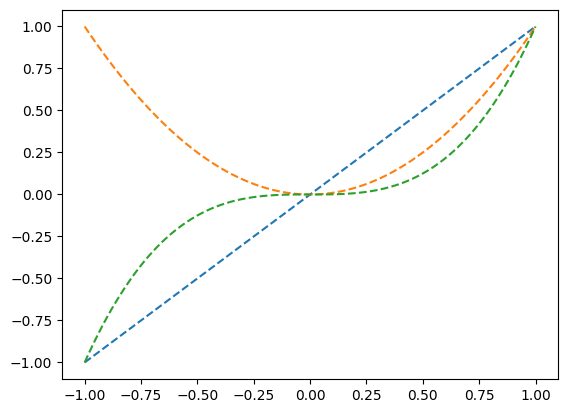

In [188]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리

In [189]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

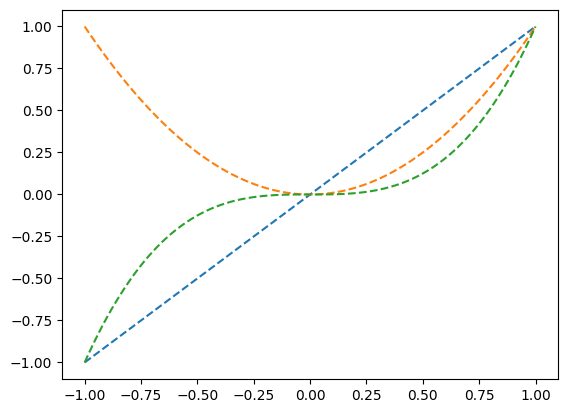

In [195]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수)

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을
계산해보기

In [208]:
g = lambda x: x**2 

$g(x)=x^2$

$$g'(x)=gg(x)=2x\approx \frac{g(x+0.001)-g(x)}{0.001}$$

In [209]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [210]:
gg(4)

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의
함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다.

In [228]:
def derivate(g):
    return lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [220]:
x = np.linspace(0,6.28,1000) 

In [223]:
g = lambda x: np.sin(x)

In [224]:
gg = derivate(g) 

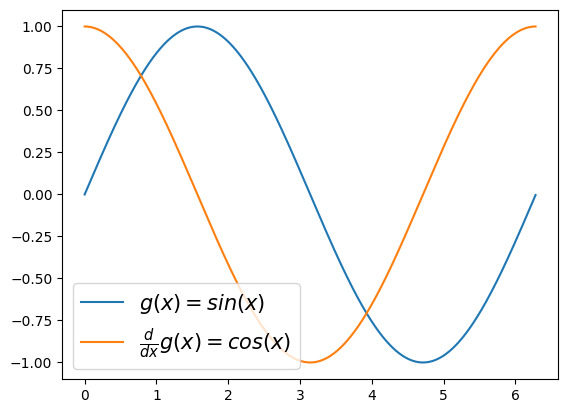

In [225]:
plt.plot(x,g(x),label=r'$g(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}g(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [226]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

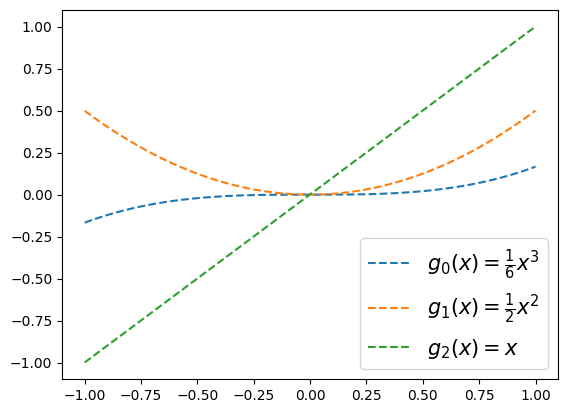

In [227]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현

In [237]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [238]:
g = lambda x: np.sin(x) 

In [239]:
gg = derivate(g) 

In [240]:
x = np.linspace(0,6.28,1000) 

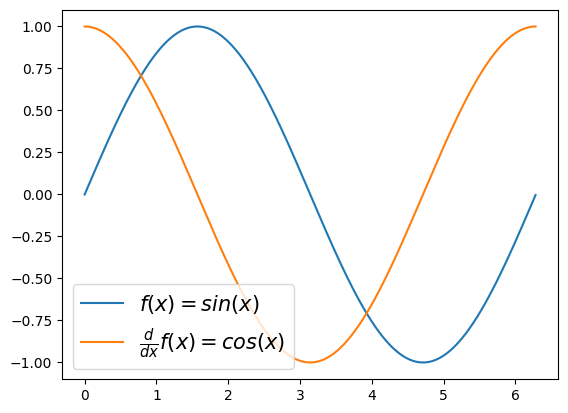

In [241]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [235]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

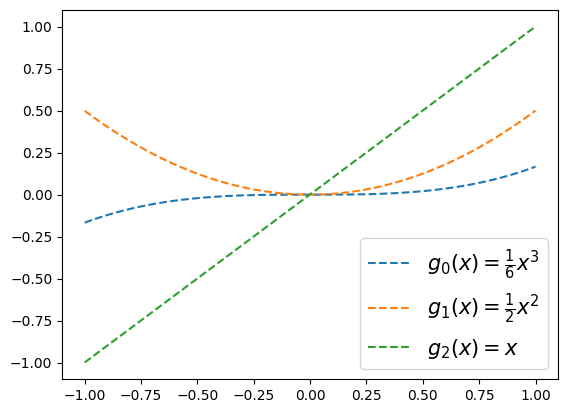

In [236]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

## map

`-` 개념: \$(f,\[x_1,x_2,,x_n\] )=\$

`-` 예제1:

In [256]:
x = [1,2,3] 
y = list(map(lambda x: x+1 ,x))

(다른구현1)

In [258]:
list(map(lambda x: x+1,[1,2,3]))

(다른구현2)

In [259]:
[f(xi) for xi in [1,2,3]]

**quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라.

In [262]:
list(map(lambda x: x**2,[1,2,3,4,5]))

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False

    입력: A,B,C,a,b,c
    출력: T,T,T,F,F,F

In [266]:
list(map(lambda x: x.isupper(), list('ABCabc')))

In [73]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [74]:
x,y

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트
컴프리헨션보다 조금 편한것 같다)

In [268]:
f= lambda x,y: x+y 
x=[1,2,3]
y=[-1,-2,-3]

In [269]:
list(map(f,x,y))

(다른구현)– 리스트컴프리헨션

In [282]:
f = lambda x,y: x+y 
[f(xi,yi) for xi,yi in zip(x,y)] 

**quiz**

In [283]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

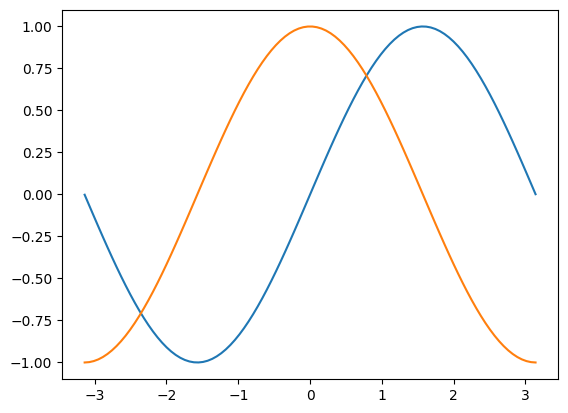

In [287]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고
결과를 시각화 하라.

In [79]:
f = (lambda x,y: max(x,y))
f(3,4)

In [80]:
z= list(map(f,x,y))

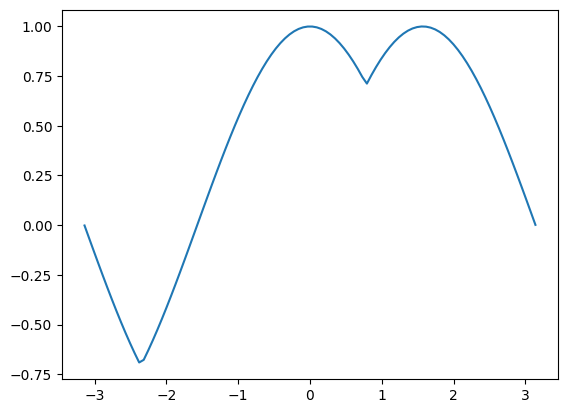

In [81]:
plt.plot(t,z)

`-` 예제4: map은 “하나의 함수에 다양한 입력”을 적용하는 경우에만
사용가능, 리스트컴프리헨션은 “다양한 함수에 다양한 입력” 지원

In [291]:
flst = [lambda x: x+1, lambda x: x+2, lambda x: x+3] 

map으로 구현시도 $\to$ 실패

In [303]:
x=[-1,-2,-3]

In [296]:
list(map(flst,x)) # 결과가 0,0,0

리스트컴프리헨션으로 구현시도 $\to$ 성공

In [316]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

`-` 종합: map과 리스트컴프리헨션과 비교

-   map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은
    필요함
-   map은 좀 더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음.

# Pandas: transform column

## `lambda`

`-` 예시1: $x \to x+2$

In [74]:
f = lambda x: x+2
f(1)

`-` 예시2: $x,y \to x+y$

In [75]:
f = lambda x,y: x+y
f(1,2)

`-` 예시3: ‘2023-09’ $\to$ 9

In [76]:
f = lambda x: int(x[-2:])
f('2023-09')

`-` 예시4: ‘2023-09’ $\to$ (2023,9)

In [77]:
f = lambda x: (int(x[:4]),int(x[-2:]))
f('2023-09')

`-` 예시5: 문자열이 ‘cat’이면 1 ’dog’ 이면 0 // ’cat이면 1 ’cat’이
아니면 0

In [78]:
f = lambda x: 1 if x=='cat' else 0

In [79]:
f('cat'), f('dog')

`-` Note: `f`로 이름을 정하지 않고 직접 사용 가능

In [80]:
(lambda x: x+1)(2)

## `map`

`-` 개념: `map(f,[x1,x2,...xn])=[f(x1),f(x2),...,f(xn)]`

`-` 예시1: `x->x+1`을 `[1,2,3]`에 적용

In [81]:
list(map(lambda x: x+1, [1,-5,3]))

`-` 예시2 `df.Height`열 변환하기

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height[:5]
s

In [83]:
x = s[0]
x

In [84]:
list(map(lambda x: int(x.replace('cm','')), s))

`# 예시3` `df.Height`열 변환하기 + 변환된 열 할당하기

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')

`-` (풀이1)

In [86]:
df.assign(Height= list(map(lambda x: int(x.replace('cm','')), df.Height)))

`-` (풀이2) – 사실 수틀리면 컴프리헨션 쓰면 된다.

In [87]:
df.assign(Height= [int(height.replace('cm','')) for height in df.Height])

`#`

`# 예시4` – `df.Position` 열에 아래와 같은 변환을 수행하고, 변환된 열을
할당하라.

|            before             | after |
|:-----------------------------:|:-----:|
| `<span class="pos pos28">SUB` | `SUB` |
| `<span class="pos pos15">LCM` | `LCM` |
|  `<span class="pos pos7">LB`  | `LB`  |
| `<span class="pos pos13">RCM` | `RCM` |
| `<span class="pos pos13">RCM` | `RCM` |

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')

`-` (풀이1)

In [89]:
x = df.Position[0]
x

In [90]:
df.assign(Position = list(map(lambda x: x.split('>')[-1] if not pd.isna(x) else 'NA', df.Position)))

`-` (풀이2) – 리스트컴프리헨션

In [91]:
f = lambda x: x.split('>')[-1] if not pd.isna(x) else 'NA'

In [92]:
df.assign(Position = [f(x) for x in df.Position])

-   개인의견: 이미 람다로 함수를 만들어야 해서 그냥 map을 쓰는게
    자연스러움

## `s.apply(변환함수)`

`-` 예시1: 원소별로 처음3개의 숫자만 출력

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

In [103]:
s.apply(lambda x: x[:3])

`-` 예시2: 원소별로 처음3개의 문자만 출력 $\to$ `str`자료형을
`int`자료형으로 변환

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

(방법1) – 한번에

In [105]:
s.apply(lambda x: int(x[:3]))

(방법2) – 연쇄적으로..

In [106]:
s.apply(lambda x: x[:3]).apply(int)

## `s.str`, `idx.str`

`-` 예시1: 원소별로 처음 3개의 숫자만 출력

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

In [108]:
s.str[:3]

`-` 예시2: 원소별로 isupper를 수행

In [109]:
s = pd.Series(['A','B','C','d','e','F'])
s

In [110]:
s.str.isupper()

`-` 예시3: 원소별로 공백제거 (pd.Series 뿐만 아니라 pd.Index 자료형에도
사용가능)

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
idx = df.columns

In [112]:
idx.str.replace(' ','')

## `s.astype()`

`-` 예시1: 원소의 타입을 모두 `int`형으로 변경

In [113]:
s = pd.Series(list('12345'))
s

In [114]:
s.astype(int)

`-` 예시2: 원소의 타입을 변환한 이후 브로드캐스팅 (int)

In [115]:
s1 = pd.Series(list('12345'))
s2 = pd.Series([-1,-2,-3,-4,-5])

In [116]:
s1.astype(int)+s2

`# 예시3`: 원소의 타입을 변환한 이후 브로드캐스팅 (str)

In [117]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")[:5]
df

위의 자료에서 `Embarked` 열과 `Pclass`열을 이용하여 아래와 같은
`New Feature`를 만들어라.

| Embarked | Pclass | New Feature |
|:--------:|:------:|:-----------:|
|   ‘S’    |   3    |    ‘S3’     |
|   ‘C’    |   1    |    ‘C1’     |
|   ‘S’    |   3    |    ‘S3’     |
|   ‘S’    |   1    |    ‘S1’     |
|   ‘S’    |   3    |    ‘S3’     |

(풀이)

In [118]:
df.Embarked + df.Pclass.astype(str)

`#`

## 컴프리헨션, `lambda+map`을 무시하지 말 것

`# 예시1`

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")[:5]
df

위의 자료에서 아래와 같은 변환을 하고 싶다면?

$$
f(\text{sex}, \text{sibsp}) = 
\begin{cases} 
0.7 + 0.25 \times \text{sibsp} & \text{if } \text{sex} = \text{'female'} \\
0.1 + 0.15 \times \text{sibsp} & \text{otherwise}
\end{cases}
$$

In [120]:
df.assign(Prob= list(map(lambda sex,sibsp: 0.7 + sibsp*0.25 if sex=='female' else 0.2 + sibsp*0.15, df.Sex, df.SibSp)))

`#`

`# 예시2`

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")[:5]
df

위의 자료에서 Name열을 아래와 같이 분리하는 작업을 수행하라.

|     | title | Name                                          |
|-----|-------|-----------------------------------------------|
| 0   | Mr    | Owen Harris Braund                            |
| 1   | Mrs   | John Bradley (Florence Briggs Thayer) Cumings |
| 2   | Miss  | Laina Heikkinen                               |
| 3   | Mrs   | Jacques Heath (Lily May Peel) Futrelle        |
| 4   | Mr    | William Henry Allen                           |

(풀이)

In [122]:
_lst = [[title,f'{first_name} {last_name}'] for last_name, title, first_name in df.Name.str.replace(', ','/').str.replace('. ','/').str.split('/')]
pd.DataFrame(_lst, columns=['title','Name2'])

참고: “Mr,Mrs,Miss” 만 뽑아내는 코드

In [123]:
df.Name.str.split(', ').str[-1].str.split('. ').str[0]

`#`